In [64]:
import numpy as np
import pandas as pd
from PIL import Image
import os
import re
from tensorflow import keras
from tensorflow.keras import initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    AveragePooling2D,
    Dropout,
    Flatten,
    Dense,
    Activation,
    BatchNormalization,
    LeakyReLU,
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

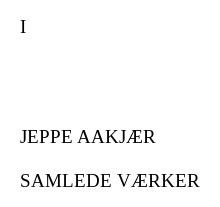

In [2]:
image = Image.open("./ps3_imgs/ps3_imgs/test/aakjaer-samlede-verker-1_DA-aac.jpg")
image

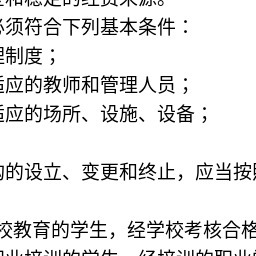

In [3]:
image = Image.open("./ps3_imgs/ps3_imgs/test/chinese-laws_ZN-ehv.jpg")
image

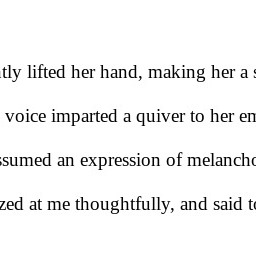

In [4]:
image = Image.open("./ps3_imgs/ps3_imgs/test/claudes-confession_EN-axu.jpg")
image

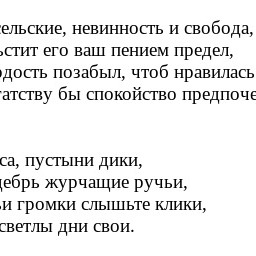

In [5]:
image = Image.open("./ps3_imgs/ps3_imgs/test/derzhavin-duhovnye-ody_RU-ami.jpg")
image

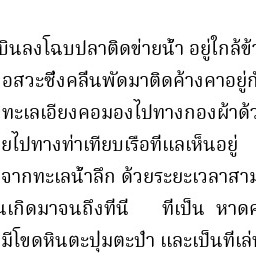

In [6]:
image = Image.open("./ps3_imgs/ps3_imgs/test/novel_00006_TH-abe.jpg")
image

In [7]:
def extract_lang(image_path):
    return re.search(r"_([A-Z]{2})[-.]", image_path).group(1)

In [8]:
extract_lang(
    "THIS-SHOULD-NOT-BE-RETURNED_EN-THIS-SHOULD-NOT-BE-RETURNED.jpg"
), extract_lang("aakjaer-samlede-verker-1_DA-aac.jpg"), extract_lang(
    "novel_00089_TH-acw.jpg"
)

('EN', 'DA', 'TH')

In [9]:
train_folder = "./ps3_imgs/ps3_imgs/train/"
test_folder = "./ps3_imgs/ps3_imgs/test/"

train_filenames = os.listdir(train_folder)
test_filenames = os.listdir(test_folder)

In [10]:
train_labels = pd.Series([extract_lang(filename) for filename in train_filenames])
test_labels = pd.Series([extract_lang(filename) for filename in test_filenames])

train_df = pd.DataFrame({"filename": train_filenames, "label": train_labels})
test_df = pd.DataFrame({"filename": test_filenames, "label": test_labels})

In [11]:
train_df.head()

,filename,label
0,aakjaer-samlede-verker-1_DA-aaa.jpg,DA
1,aakjaer-samlede-verker-1_DA-aab.jpg,DA
2,aakjaer-samlede-verker-1_DA-aad.jpg,DA
3,aakjaer-samlede-verker-1_DA-aae.jpg,DA
4,aakjaer-samlede-verker-1_DA-aaf.jpg,DA


In [12]:
test_df.head()

,filename,label
0,aakjaer-samlede-verker-1_DA-aac.jpg,DA
1,aakjaer-samlede-verker-1_DA-aak.jpg,DA
2,aakjaer-samlede-verker-1_DA-aaz.jpg,DA
3,aakjaer-samlede-verker-1_DA-abe.jpg,DA
4,aakjaer-samlede-verker-1_DA-abf.jpg,DA


In [13]:
train_df["label"].value_counts(normalize=True)

label
EN    0.263067
TH    0.233533
RU    0.207633
ZN    0.167733
DA    0.128033
Name: proportion, dtype: float64

In [14]:
test_df["label"].value_counts(normalize=True)

label
EN    0.264335
TH    0.235665
RU    0.200793
ZN    0.169784
DA    0.129423
Name: proportion, dtype: float64

In [15]:
np.random.seed(5)

subset_df = train_df.sample(n=5000, random_state=5).reset_index(drop=True)
subset_filenames = subset_df["filename"]
subset_languages = subset_df["label"]
subset_df.shape

(5000, 2)

In [16]:
subset_df["label"].value_counts(normalize=True)

label
EN    0.2664
TH    0.2424
RU    0.1976
ZN    0.1652
DA    0.1284
Name: proportion, dtype: float64

In [17]:
unique_languages = sorted(subset_df["label"].unique())
mapping = {lang: idx for idx, lang in enumerate(unique_languages)}
mapping

{'DA': 0, 'EN': 1, 'RU': 2, 'TH': 3, 'ZN': 4}

In [20]:
def load_img_file(filepath):
    img = keras.utils.load_img(
        path=filepath,
        color_mode="grayscale",
        target_size=(100, 100),
        interpolation="nearest",
        keep_aspect_ratio=False,
    )
    return img

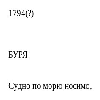

In [22]:
load_img_file(train_folder + subset_df["filename"].iloc[0])

In [23]:
subset_images = []

for filename in subset_filenames:
    img = load_img_file(train_folder + filename)
    img_array = np.array(img).reshape(10000)
    subset_images.append(img_array)

subset_images = np.array(subset_images)
subset_images.shape

(5000, 10000)

In [24]:
len(subset_images[0])

10000

In [155]:
subset_X_train, subset_X_val, subset_y_train, subset_y_val = train_test_split(
    subset_images, subset_languages, test_size=0.2, random_state=5
)

In [156]:
logclf = LogisticRegression(random_state=5)
logclf.fit(subset_X_train, subset_y_train)

c:\Users\alexz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=5)

In [159]:
rfclf = RandomForestClassifier(random_state=5)
rfclf.fit(subset_X_train, subset_y_train)

RandomForestClassifier(random_state=5)

In [160]:
nnclf = MLPClassifier(random_state=5)
nnclf.fit(subset_X_train, subset_y_train)

MLPClassifier(random_state=5)

In [161]:
logclf.score(subset_X_train, subset_y_train), logclf.score(subset_X_val, subset_y_val)

(0.98975, 0.84)

In [162]:
rfclf.score(subset_X_train, subset_y_train), rfclf.score(subset_X_val, subset_y_val)

(1.0, 0.861)

In [163]:
nnclf.score(subset_X_train, subset_y_train), nnclf.score(subset_X_val, subset_y_val)

(0.2685, 0.258)

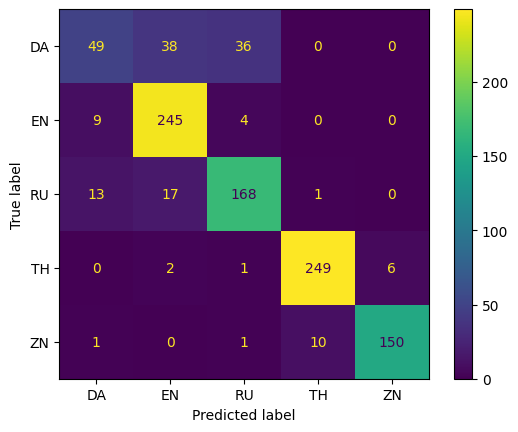

In [164]:
cm = confusion_matrix(subset_y_val, rfclf.predict(subset_X_val))
_ = ConfusionMatrixDisplay(cm, display_labels=unique_languages).plot()

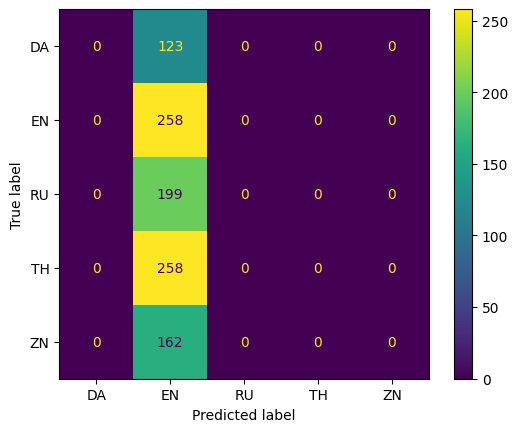

In [165]:
cm = confusion_matrix(subset_y_val, nnclf.predict(subset_X_val))
_ = ConfusionMatrixDisplay(cm, display_labels=unique_languages).plot()

In [166]:
log_param_grid = {"C": [0.01, 0.1, 1, 10, 100]}
log_grid_search = GridSearchCV(
    LogisticRegression(random_state=5),
    log_param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2,
)
log_grid_search.fit(subset_X_train, subset_y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


c:\Users\alexz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=5), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy',
             verbose=2)

In [167]:
log_grid_search.best_params_

{'C': 0.01}

In [168]:
logclf = LogisticRegression(C=0.01, random_state=5)
logclf.fit(subset_X_train, subset_y_train)

c:\Users\alexz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01, random_state=5)

In [169]:
logclf.score(subset_X_train, subset_y_train), logclf.score(subset_X_val, subset_y_val)

(0.973, 0.828)

In [170]:
rf_param_grid = {"max_depth": [10, 20, 30, None], "min_samples_leaf": [1, 2, 4]}
rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=5),
    rf_param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2,
)
rf_grid_search.fit(subset_X_train, subset_y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=5), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4]},
             scoring='accuracy', verbose=2)

In [171]:
rf_grid_search.best_params_

{'max_depth': 20, 'min_samples_leaf': 1}

In [172]:
rfclf = RandomForestClassifier(max_depth=20, min_samples_leaf=1, random_state=5)
rfclf.fit(subset_X_train, subset_y_train)

RandomForestClassifier(max_depth=20, random_state=5)

In [173]:
rfclf.score(subset_X_train, subset_y_train), rfclf.score(subset_X_val, subset_y_val)

(0.9975, 0.867)

In [174]:
mlp_param_grid = {
    "hidden_layer_sizes": [(50,), (100,), (50, 50), (100, 50)],
    "alpha": [0.0001, 0.001, 0.01],
    "learning_rate_init": [0.001, 0.01, 0.1],
}
mlp_random_search = RandomizedSearchCV(
    MLPClassifier(random_state=5),
    mlp_param_grid,
    cv=3,
    scoring="accuracy",
    n_iter=10,
    n_jobs=-1,
    verbose=3,
)
mlp_random_search.fit(subset_X_train, subset_y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=MLPClassifier(random_state=5), n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(50,), (100,),
                                                               (50, 50),
                                                               (100, 50)],
                                        'learning_rate_init': [0.001, 0.01,
                                                               0.1]},
                   scoring='accuracy', verbose=3)

In [175]:
mlp_random_search.best_params_

{'learning_rate_init': 0.001, 'hidden_layer_sizes': (100, 50), 'alpha': 0.0001}

In [176]:
nnclf = MLPClassifier(
    learning_rate_init=0.001, hidden_layer_sizes=(100, 50), alpha=0.0001, random_state=5
)
nnclf.fit(subset_X_train, subset_y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), random_state=5)

In [177]:
nnclf.score(subset_X_train, subset_y_train), nnclf.score(subset_X_val, subset_y_val)

(0.9265, 0.82)

In [178]:
logclf.score(subset_X_train, subset_y_train), logclf.score(subset_X_val, subset_y_val)

(0.973, 0.828)

In [179]:
rfclf.score(subset_X_train, subset_y_train), rfclf.score(subset_X_val, subset_y_val)

(0.9975, 0.867)

In [180]:
nnclf.score(subset_X_train, subset_y_train), nnclf.score(subset_X_val, subset_y_val)

(0.9265, 0.82)

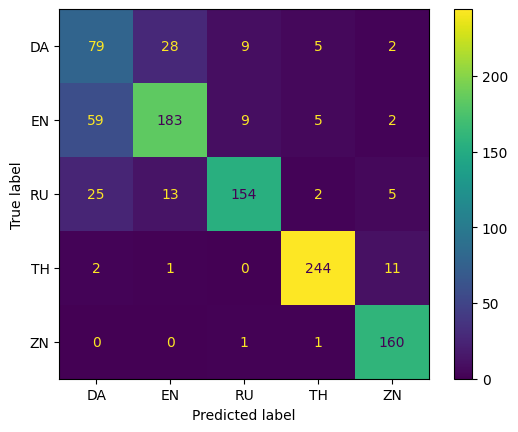

In [181]:
cm = confusion_matrix(subset_y_val, nnclf.predict(subset_X_val))
_ = ConfusionMatrixDisplay(cm, display_labels=unique_languages).plot()

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [190]:
subset_generator = ImageDataGenerator(
    rescale=1.0 / 255, width_shift_range=0.25, height_shift_range=0.25
).flow_from_dataframe(
    subset_df,
    train_folder,
    x_col="filename",
    y_col="label",
    target_size=(100, 100),
    class_mode="categorical",
    color_mode="grayscale",
    shuffle=True,
    batch_size=8,
)

Found 5000 validated image filenames belonging to 5 classes.


In [ ]:
subset_generator_no_shuf = ImageDataGenerator(rescale=1.0 / 255).flow_from_dataframe(
    subset_df,
    train_folder,
    x_col="filename",
    y_col="label",
    target_size=(100, 100),
    class_mode="categorical",
    color_mode="grayscale",
    shuffle=False,
    batch_size=8,
)

Found 5000 validated image filenames belonging to 5 classes.


In [67]:
training_generator = ImageDataGenerator(
    rescale=1.0 / 255, width_shift_range=0.25, height_shift_range=0.25
).flow_from_dataframe(
    train_df,
    train_folder,
    x_col="filename",
    y_col="label",
    target_size=(100, 100),
    class_mode="categorical",
    color_mode="grayscale",
    shuffle=True,
    batch_size=8,
)

Found 30000 validated image filenames belonging to 5 classes.


In [68]:
training_generator_no_shuf = ImageDataGenerator(rescale=1.0 / 255).flow_from_dataframe(
    train_df,
    train_folder,
    x_col="filename",
    y_col="label",
    target_size=(100, 100),
    class_mode="categorical",
    color_mode="grayscale",
    shuffle=False,
    batch_size=8,
)

Found 30000 validated image filenames belonging to 5 classes.


In [69]:
test_generator = ImageDataGenerator(rescale=1.0 / 255).flow_from_dataframe(
    test_df,
    test_folder,
    x_col="filename",
    y_col="label",
    target_size=(100, 100),
    class_mode="categorical",
    color_mode="grayscale",
    shuffle=False,
    batch_size=8,
)

Found 9836 validated image filenames belonging to 5 classes.


In [191]:
model = Sequential()
model.add(keras.Input(shape=(100, 100, 1)))
model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (5, 5), activation="relu"))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

c:\Users\alexz\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_87 (Conv2D)              │ (None, 96, 96, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_82 (LeakyReLU)      │ (None, 96, 96, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_86          │ (None, 96, 96, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_86 (MaxPooling2D) │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_107 (Dropout)           │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_88 (Conv2D)              │ (None, 44, 44, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_83 (LeakyReLU)      │ (None, 44, 44, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_87          │ (None, 44, 44, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_87 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_108 (Dropout)           │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 18, 18, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_84 (LeakyReLU)      │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_88          │ (None, 18, 18, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_88 (MaxPooling2D) │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_109 (Dropout)           │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 128)            │     1,327,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_110 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,585,797 (6.05 MB)

 Trainable params: 1,585,349 (6.05 MB)

 Non-trainable params: 448 (1.75 KB)

In [192]:
model.fit(subset_generator, epochs=8)

Epoch 1/8


c:\Users\alexz\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 116ms/step - accuracy: 0.4944 - loss: 2.2459
Epoch 2/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7423 - loss: 0.8450
Epoch 3/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 100ms/step - accuracy: 0.7577 - loss: 0.8071
Epoch 4/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 0.7947 - loss: 0.7635
Epoch 5/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 95ms/step - accuracy: 0.7938 - loss: 0.7394
Epoch 6/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.8032 - loss: 0.7071
Epoch 7/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8275 - loss: 0.6124
Epoch 8/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.8320 - loss: 0.5769


In [193]:
y_pred = model.predict(subset_generator_no_shuf)
y_pred = np.argmax(y_pred, axis=1)
y_true = subset_generator_no_shuf.classes
accuracy_score(y_true, y_pred)

625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step


0.5178

In [194]:
confusion_matrix(y_true, y_pred)

array([[   0,   13,  620,    9,    0],
       [   0,  321, 1011,    0,    0],
       [   0,    6,  970,   12,    0],
       [   0,    0,   36, 1176,    0],
       [   0,    0,  679,   25,  122]], dtype=int64)

In [195]:
y_pred = model.predict(training_generator_no_shuf)
y_pred = np.argmax(y_pred, axis=1)
y_true = training_generator_no_shuf.classes
accuracy_score(y_true, y_pred)

3750/3750 ━━━━━━━━━━━━━━━━━━━━ 292s 78ms/step


0.5178666666666667

In [196]:
confusion_matrix(y_true, y_pred)

array([[   0,  102, 3666,   73,    0],
       [   0, 1870, 6021,    1,    0],
       [   0,   34, 6147,   48,    0],
       [   0,    4,  199, 6803,    0],
       [   2,    0, 4166,  148,  716]], dtype=int64)

In [197]:
model.evaluate(test_generator)

1230/1230 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.2354 - loss: 38.8941


[21.26189613342285, 0.5150467753410339]

In [150]:
model.fit(training_generator, epochs=15)

Epoch 1/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 275s 73ms/step - accuracy: 0.6736 - loss: 1.4472
Epoch 2/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 302s 81ms/step - accuracy: 0.8147 - loss: 0.6303
Epoch 3/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 293s 78ms/step - accuracy: 0.8312 - loss: 0.5606
Epoch 4/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 316s 84ms/step - accuracy: 0.8448 - loss: 0.5556
Epoch 5/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 286s 76ms/step - accuracy: 0.8498 - loss: 0.4987
Epoch 6/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 272s 73ms/step - accuracy: 0.8503 - loss: 0.5146
Epoch 7/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 277s 74ms/step - accuracy: 0.8680 - loss: 0.5006
Epoch 8/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 310s 83ms/step - accuracy: 0.8651 - loss: 0.5049
Epoch 9/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 338s 90ms/step - accuracy: 0.8634 - loss: 0.5045
Epoch 10/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 310s 83ms/step - accuracy: 0.8761 - loss: 0.4680
Epoch 11/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 324s 86ms/step - accuracy: 0.8772 - loss: 0.48

In [151]:
model.evaluate(subset_generator_no_shuf)

625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.3547 - loss: 30.4593


[30.24170684814453, 0.3571999967098236]

In [152]:
model.evaluate(training_generator_no_shuf)

3750/3750 ━━━━━━━━━━━━━━━━━━━━ 76s 20ms/step - accuracy: 0.4713 - loss: 29.8528


[30.271602630615234, 0.3610000014305115]

In [153]:
model.evaluate(test_generator)

1230/1230 ━━━━━━━━━━━━━━━━━━━━ 107s 87ms/step - accuracy: 0.4697 - loss: 29.9915


[30.337636947631836, 0.36030906438827515]

1230/1230 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step


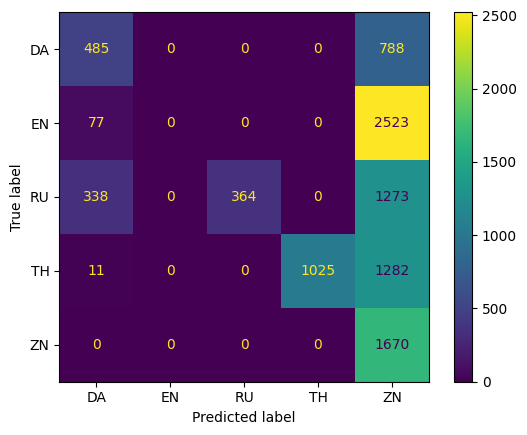

In [154]:
y_pred_test = model.predict(test_generator)
y_pred_test = np.argmax(y_pred_test, axis=1)

cm_test = confusion_matrix(test_generator.classes, y_pred_test)
ConfusionMatrixDisplay(cm_test, display_labels=unique_languages).plot()